In [1]:
#Imports
import pandas as pd
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df = pd.read_excel(url, header=1, index_col=0, engine='xlrd')
df.rename(columns={'default payment next month': 'default'}, inplace=True)

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Define target and features
X = df.drop(columns='default')
y = df['default']

acc_baseline= y.value_counts(normalize=True).max()
print(f"The baseline accuracy is: {acc_baseline}")

The baseline accuracy is: 0.7788


In [4]:
#Preprocessing
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
numerical_features = [col for col in X.columns if col not in categorical_features]

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (24000, 23)
Shape of X_test: (6000, 23)
Shape of y_train: (24000,)
Shape of y_test: (6000,)


In [6]:
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# ADABOOST

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score,make_scorer

In [8]:
adc=AdaBoostClassifier(n_estimators=300)
adc.fit(X_train_processed,y_train)

y_pred=adc.predict(X_test_processed)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, adc.predict_proba(X_test_processed)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.8187
Precision: 0.6697
F1 Score: 0.4494
Recall: 0.3382
AUC: 0.7782


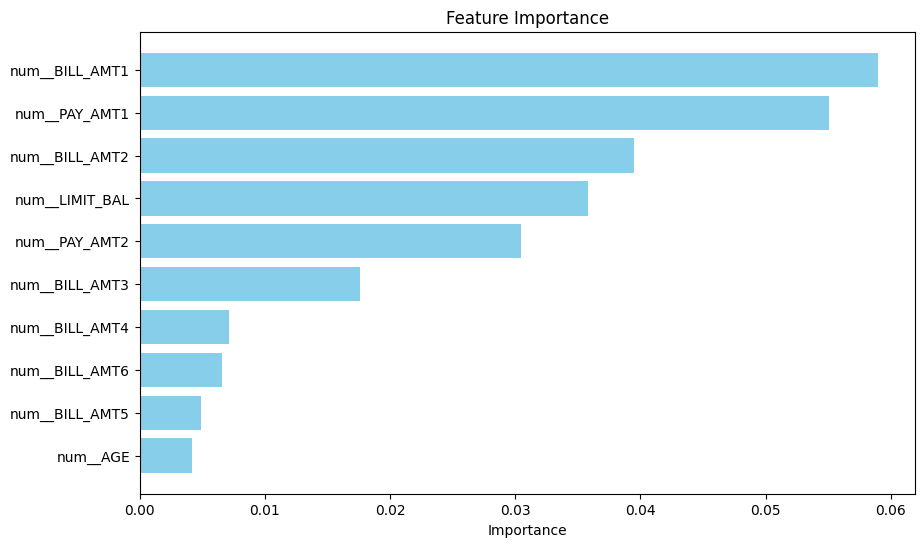

In [9]:
feature_importances = adc.feature_importances_
feature_names = preprocessor.get_feature_names_out() 

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.head(10).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# ADABOOST WITH SMOTE

In [10]:
from imblearn.over_sampling import SMOTENC
sm = SMOTE(random_state=42)
X_smotenc, y_smotenc = sm.fit_resample(X_train_processed, y_train)

In [11]:
adc=AdaBoostClassifier(n_estimators=300)
adc.fit(X_smotenc,y_smotenc)

y_pred=adc.predict(X_test_processed)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, adc.predict_proba(X_test_processed)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.7762
Precision: 0.4894
F1 Score: 0.5075
Recall: 0.5270
AUC: 0.7577


# ADABOOST WITH OVERSAMPLING

In [12]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train_processed, y_train)

In [13]:
adc=AdaBoostClassifier(n_estimators=300)
adc.fit(X_ros,y_ros)

y_pred=adc.predict(X_test_processed)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, adc.predict_proba(X_test_processed)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.7540
Precision: 0.4538
F1 Score: 0.5202
Recall: 0.6093
AUC: 0.7740


# ADABOOST WITH UNDERSAMPLING

In [14]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train_processed, y_train)


In [15]:
adc=AdaBoostClassifier(n_estimators=300)
adc.fit(X_rus,y_rus)

y_pred=adc.predict(X_test_processed)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, adc.predict_proba(X_test_processed)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.7563
Precision: 0.4583
F1 Score: 0.5281
Recall: 0.6230
AUC: 0.7712


# XGBOOST

In [16]:
from xgboost import XGBClassifier

In [17]:
bst = XGBClassifier(tree_method="hist", enable_categorical=True)
# fit model
bst.fit(X_train_processed, y_train)
# make predictions
y_pred = bst.predict(X_test_processed)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, bst.predict_proba(X_test_processed)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.8135
Precision: 0.6293
F1 Score: 0.4576
Recall: 0.3595
AUC: 0.7666



# XGBOOST WITH SMOTE

In [19]:
bst = XGBClassifier(tree_method="hist", enable_categorical=True)
# fit model
bst.fit(X_smotenc, y_smotenc)
# make predictions
y_pred = bst.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, bst.predict_proba(X_test_processed)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.8060
Precision: 0.5756
F1 Score: 0.4935
Recall: 0.4318
AUC: 0.7544


# XGBOOST WITH OVERSAMPLING

In [21]:
bst = XGBClassifier(tree_method="hist", enable_categorical=True)
# fit model
bst.fit(X_ros, y_ros)
# make predictions
y_pred = bst.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, bst.predict_proba(X_test_processed)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.7658
Precision: 0.4717
F1 Score: 0.5216
Recall: 0.5834
AUC: 0.7652


# XGBOOST WITH UNDERSAMPLING

In [22]:
bst = XGBClassifier(tree_method="hist", enable_categorical=True)
# fit model
bst.fit(X_rus, y_rus)
# make predictions
y_pred = bst.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, bst.predict_proba(X_test_processed)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.7120
Precision: 0.4049
F1 Score: 0.5057
Recall: 0.6733
AUC: 0.7667


In [23]:
!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable


In [24]:
import lightgbm as lgb 
from sklearn.preprocessing import StandardScaler 
from lightgbm import LGBMClassifier 

In [ ]:
#df_scaled=df_boost.copy()

In [ ]:
#float_columns = df_scaled.select_dtypes(include=['float64']).columns

#Applying StandardScaler to float columns
#scaler = StandardScaler()
#df_scaled[float_columns] = scaler.fit_transform(df_scaled[float_columns])

#scaling doesn't improve musch

In [ ]:
#X_new=df_scaled.drop('default.payment.next.month', axis=1)
#y_new=df_scaled['default.payment.next.month']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

lgb_model=LGBMClassifier(metric='auc',force_col_wise=True,learning_rate=0.1,num_leaves=31,colsample_bytree=0.8,min_child_samples=20,subsample=0.6)
lgb_model.fit(X_train,y_train)

y_pred=lgb_model.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


[LightGBM] [Info] Number of positive: 5323, number of negative: 18677
[LightGBM] [Info] Total Bins 3264
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221792 -> initscore=-1.255256
[LightGBM] [Info] Start training from score -1.255256
Accuracy: 0.8222
Precision: 0.6713
F1 Score: 0.4746
Recall: 0.3671
AUC: 0.7796


In [28]:
feature_importances = lgb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

ValueError: All arrays must be of the same length

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = { 
    'max_depth': [10, 20, 30],
    'min_child_samples': [20, 30, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create a scorer
scorer = make_scorer(f1_score)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, 
                           scoring=scorer, cv=2, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Get the best model
best_model = grid_search.best_estimator_

Fitting 2 folds for each of 81 candidates, totalling 162 fits
[LightGBM] [Info] Number of positive: 6636, number of negative: 23364
[LightGBM] [Info] Total Bins 3269
[LightGBM] [Info] Number of data points in the train set: 30000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221200 -> initscore=-1.258687
[LightGBM] [Info] Start training from score -1.258687
Best parameters found:  {'colsample_bytree': 1.0, 'max_depth': 20, 'min_child_samples': 50, 'subsample': 0.6}


In [30]:
lgb_model=LGBMClassifier(metric='auc',force_col_wise=True,learning_rate=0.1,num_leaves=31,colsample_bytree=0.8,min_child_samples=20,subsample=0.6)
lgb_model.fit(X_smotenc,y_smotenc)

y_pred=lgb_model.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


[LightGBM] [Info] Number of positive: 18677, number of negative: 18677
[LightGBM] [Info] Total Bins 11901
[LightGBM] [Info] Number of data points in the train set: 37354, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LightGBMError: The number of features in data (23) is not the same as it was in training data (91).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.

In [27]:
lgb_model=LGBMClassifier(metric='auc',force_col_wise=True,learning_rate=0.1,num_leaves=31,colsample_bytree=0.8,min_child_samples=20,subsample=0.6)
lgb_model.fit(X_ros,y_ros)

y_pred=lgb_model.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


[LightGBM] [Info] Number of positive: 18677, number of negative: 18677
[LightGBM] [Info] Total Bins 3324
[LightGBM] [Info] Number of data points in the train set: 37354, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LightGBMError: The number of features in data (23) is not the same as it was in training data (91).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.

In [ ]:
lgb_model=LGBMClassifier(metric='auc',force_col_wise=True,learning_rate=0.1,num_leaves=31,colsample_bytree=0.8,min_child_samples=20,subsample=0.6)
lgb_model.fit(X_rus,y_rus)

y_pred=lgb_model.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")
